# Predicting Heart Disease using Machine Learning

 This notebook looks into using various Python-based machine Learning and data science libraries in an attempt to build a machine Learning model capable of predicting whether or not someone has heart disease based on their medical attributes acquired....

We're going to approach in the following way - 

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation



# 1. Problem Definition

In our case, the problem we will be exploring is *`binary classification`* (a sample can only be one of two things).

This is because we're going to be using a number of differnet *`features`* (pieces of information) about a person to predict whether they have heart disease or not.


In a statement,



> Given clinical Parameters about a patient, can we predict whether or not they have heart disease?

# 2. Data

The original data came from the Cleavland data from UCI MachineLearning Repository 
https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available in Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

We have used the dataset from the Kaggle.

The original database contains 76 attributes, but here only 14 attributes will be used. *`Attributes`* (also called *`features`*) are the variables what we'll use to predict our *`target variable`*.

# 3. Evaluation
> Our model will be efficient if it is able to predict whether the person has heart disease or not with high accuracy

## 4. Features

Features are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a ***`data dictionary`***.


##### **`Heart Disease Data Dictionary`**


A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a *`subject matter expert`* (someone who knows about the data) for more.

The information of the features in our data is given below - 

1. age - age in years

2. sex - (1 = male, 0 = female)

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for 
   concern.

5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat

    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise 
    * unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)

13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/auto_examples/index.html#decomposition-examples) for machine learning modelling and evaluation.

In [106]:
# To access system functions
import os

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Model Evaluators
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay



# For Saving model
import pickle

# Print Last Updated
import time
print(f"Last updated : {time.asctime()}")


Last updated : Tue Aug 29 21:50:03 2023


## Load Data

There are many different kinds of ways to store data. The typical way of storing ***`tabular data`***, data similar to what you'd see in an Excel file is in *`.csv`* format. *`.csv`* stands for comma seperated values.

Pandas has a built-in function to read *`.csv`* files called *`read_csv()`* which takes the file pathname of your *`.csv`* file. You'll likely use this a lot.

In [107]:



df = pd.read_csv("heart-disease .csv")

rows,columns = df.shape
print(f"Number of Rows in the dataset : {rows}")
print(f"Number of Columns in the dataset : {columns}")


Number of Rows in the dataset : 303
Number of Columns in the dataset : 14


## Data Exploration (exploratory data analysis or EDA)

Once you've imported a dataset, the next step is to explore. There's no set way of doing this. But what you should be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the target variable. Refer back to your ***`data dictionary`*** and remind yourself of what different columns mean.

Your goal is to become a subject matter expert on the dataset you're working with. So if someone asks you a question about it, you can give them an explanation and when you start building models, you can sound check them to make sure they're not performing too well (*`overfitting`*) or why they might be performing poorly (*`underfitting`*).



Since EDA has no real set methodolgy, the following is a short check list you might want to walk through:
1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?



Once of the quickest and easiest ways to check your data is with the *`head()`* function. Calling it on any dataframe will print the top 5 rows, *`tail()`* calls the bottom 5. You can also pass a number to them like *`head(10)`* to show the top 10 rows.

In [108]:
# Top five rows of dataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
# Last 10 rows of Dataframe
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [110]:
# Let's see how diferent kinds of values are there in the target column..
df["target"].value_counts()

#  As we see the count of 1's and 0's in the target column are almost same ...which means there is no data-imbalance...

# An unbalanced target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, 
# all of your target classes have the same number of samples.

1    165
0    138
Name: target, dtype: int64

If you'd prefer these values in percentages, ***`value_counts()`*** takes a parameter, *`normalize`* which can be set to true.

In [111]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

We can plot the target column value counts by calling the ***`plot()`*** function and telling it what kind of plot we'd like, in this case, bar is good.

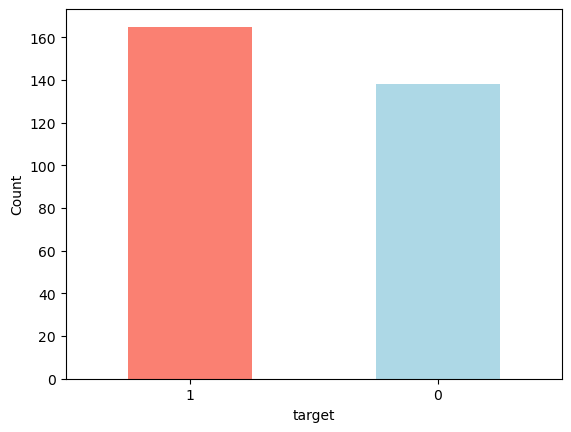

In [112]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);
plt.xticks(rotation = 0);
plt.xlabel("target");
plt.ylabel("Count");


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [114]:
# Checking for any null values...
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

***`describe()`*** shows a range of different metrics about your numerical columns such as mean, max and standard deviation.

In [115]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

Comparing the  `target` on the basis of feature `sex`

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`.

In [116]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [117]:
# Compare target columns with sex column
pd.crosstab(df["target"],df["sex"])

# Now seeing the result of comparison from our existing `Dataset` ...we can assume that 75% of female has heart-disease (as 72/96) and
# around 45% of male has heart-disease (as 93/207)

sex,0,1
target,,
0,24,114
1,72,93


##### Making our crosstab visual

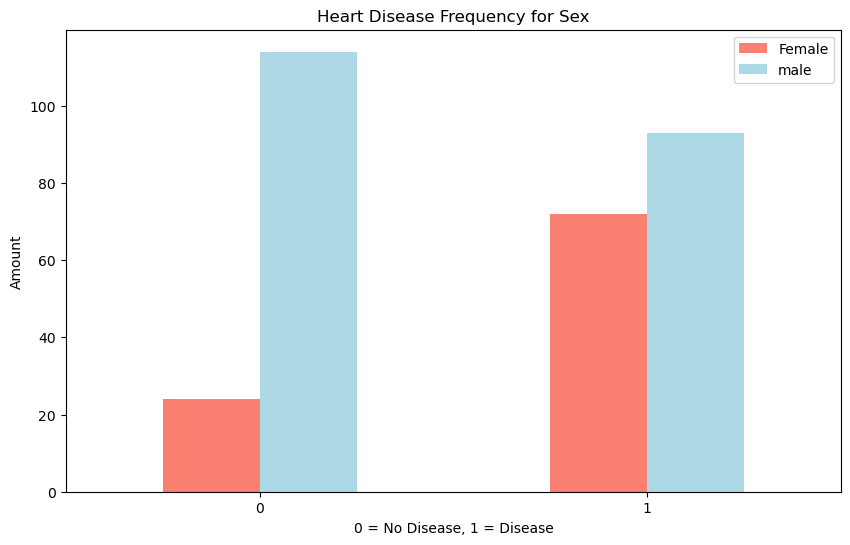

In [118]:
# Creating a Plot of the crosstab
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",
                                         figsize=(10,6),
                                         color=["salmon","lightblue"]);

plt.title("Heart Disease Frequency for Sex");
plt.xlabel("0 = No Disease, 1 = Disease");
plt.ylabel("Amount");
plt.legend(["Female","male"]);
plt.xticks(rotation=0);

### Age Vs. Max Heart Rate `(thalach)` for Heart Disease


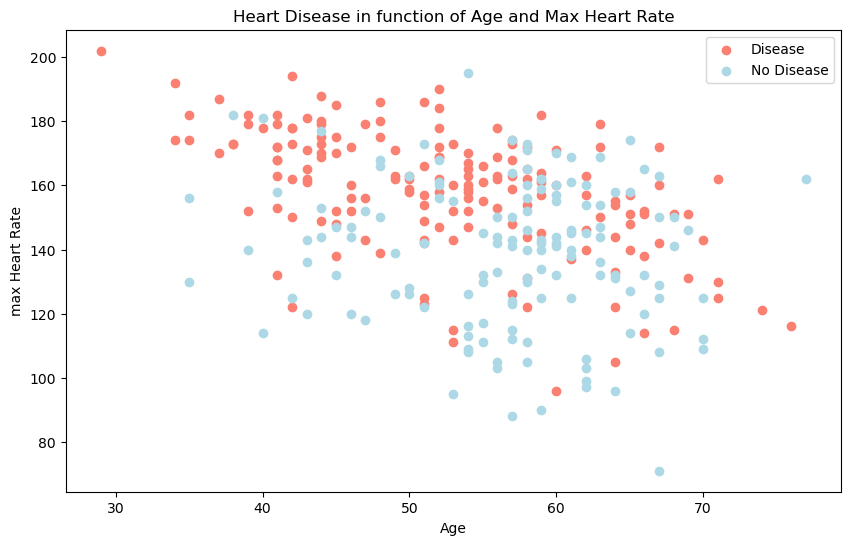

In [119]:
# Create a figure
plt.figure(figsize=(10,6));


# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target == 1],
            c = "salmon");


# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue");

# Adding some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate");
plt.xlabel("Age")
plt.ylabel("max Heart Rate")
plt.legend(["Disease","No Disease"]);


What can we infer from this?

It seems the younger someone is, the higher their max heart rate (dots are higher on the left of the graph) and the older someone is, the more green dots there are. But this may be because there are more dots all together on the right side of the graph (older participants).

Both of these are observational of course, but this is what we're trying to do, build an understanding of the data.

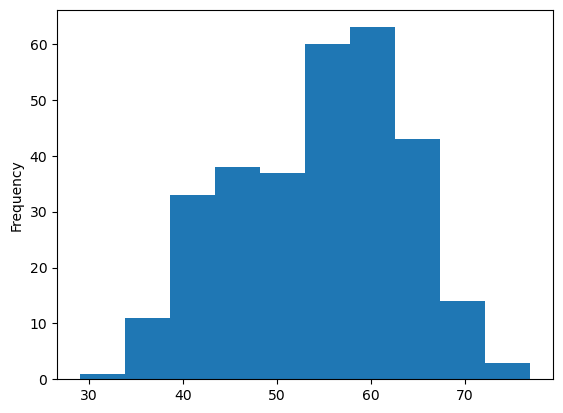

In [120]:
# Checking the distributioon of age column using a Histogram
df.age.plot.hist();

We can see it's a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) but slightly swaying to the right, which reflects in the scatter plot above.

#### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

In [121]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


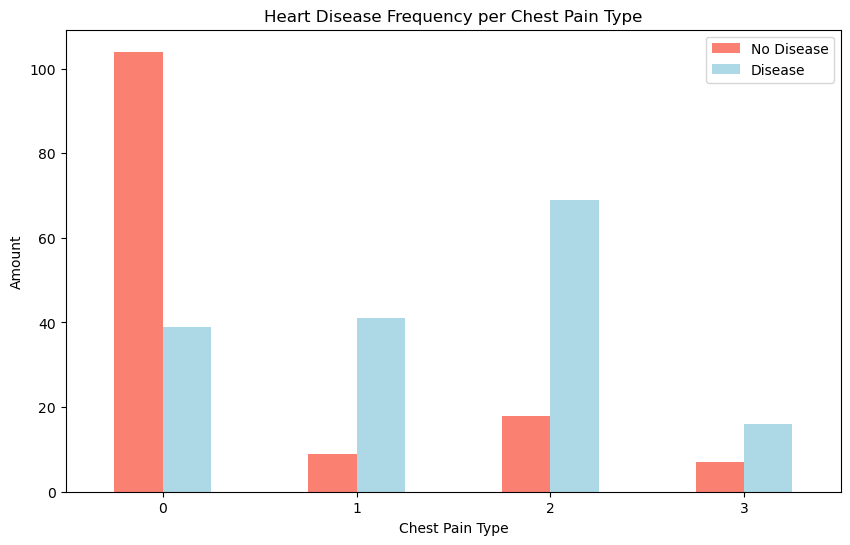

In [122]:
# plotting the above relation of chest pain with target
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"]);


# Adding some information
plt.title("Heart Disease Frequency per Chest Pain Type");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount");
plt.legend(["No Disease","Disease"]);
plt.xticks(rotation=0);

**Correlation between independent variables**

In [123]:
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


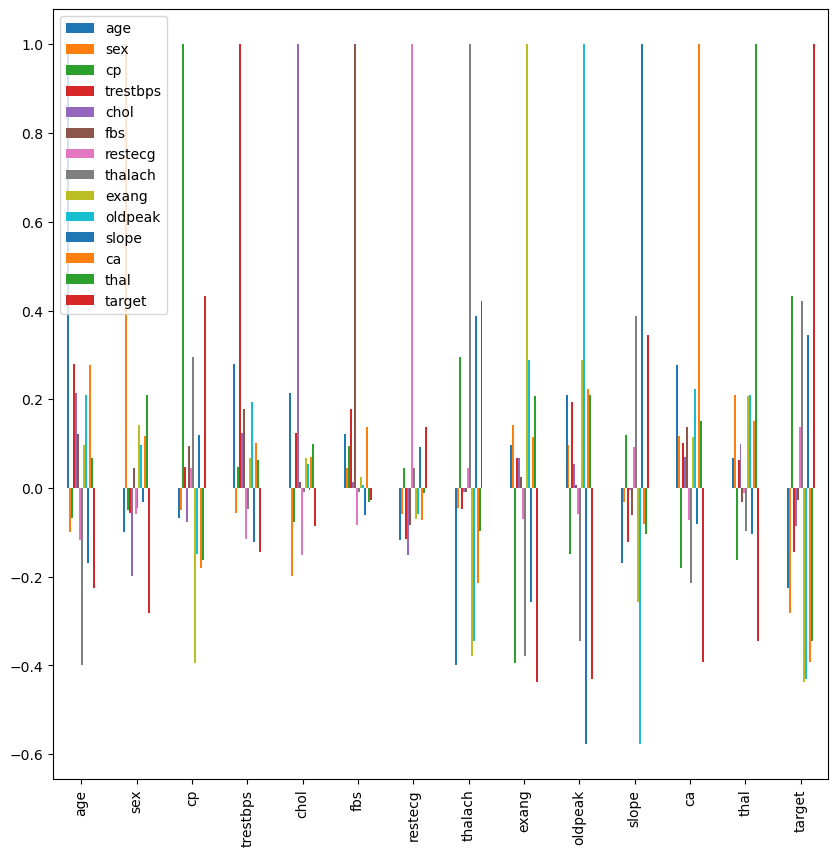

In [124]:
correlation_matrix.plot(kind="bar",
                        figsize=(10,10));

(14.5, -0.5)

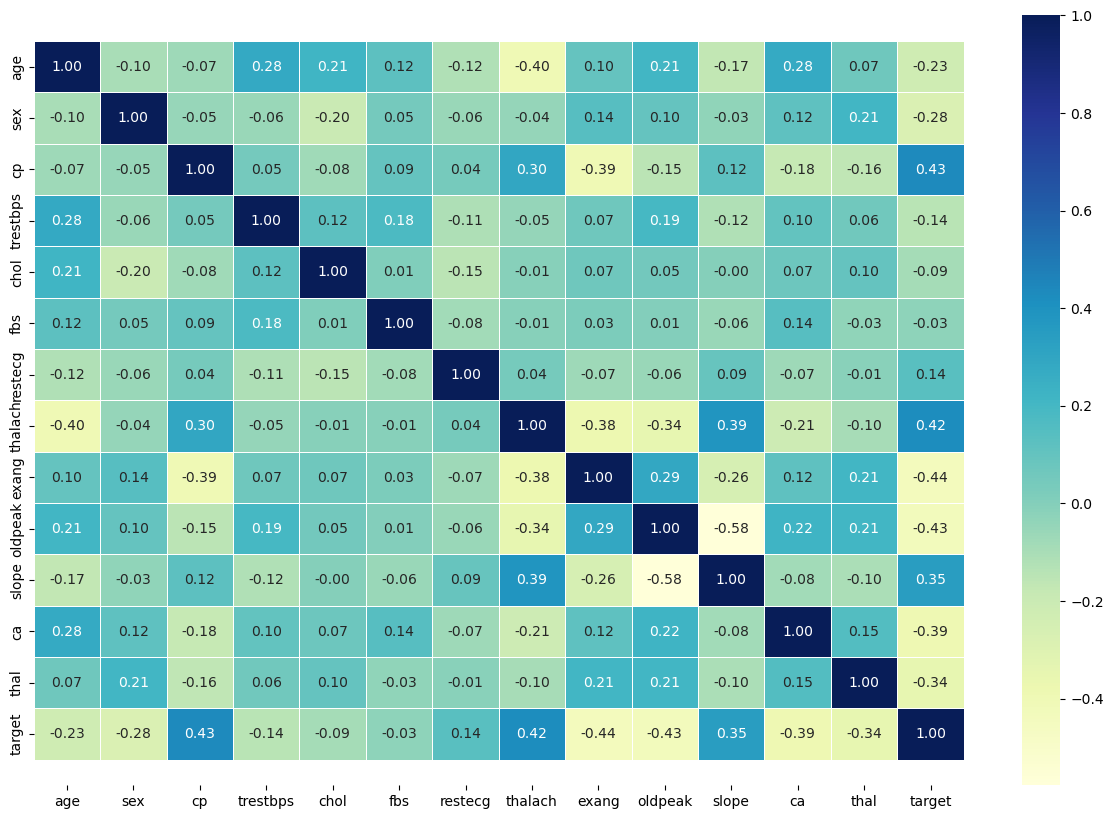

In [125]:
# Making corelation matrix little prettier
fig,ax = plt.subplots(figsize=(15,10));
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


bottom,top = ax.get_ylim()
bottom,top
ax.set_ylim(bottom+0.5,top-0.5)



### 5. Modelling

In [126]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [127]:
# Splitting the data into X and y

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [128]:
# Independent Variables (no target column)
X.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2


In [129]:
# Targets
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

**Training and test split**

In [130]:
# Split the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


In [131]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [132]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

##### Now we're going to try 3 different learning models...

    1. Logistic Regression
    2. k-Nearest Neighbours Classification
    3. Random Forest Classifier

In [133]:
# Putting models in a Dictionary
models = {"Logistic Regression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}


# Create a function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    This function fits all the 3 models and store there respective scores
    """
    
    # Making  a Dictionary to keep model scores
    model_scores = {}
    
    # Looping through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append it scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    
    return model_scores

In [134]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)


model_scores

c:\Users\91747\miniconda3\envs\pythonCommonENV\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

#### Model Comparison

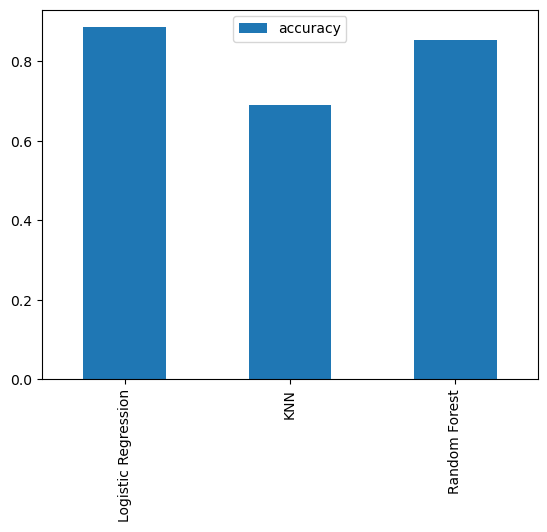

In [135]:
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

##### Now we've got a baseline model....Now we will look at the following:

* Hyperparameter tuning
* Feature importance
* [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
* [Cross-Validation](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
* [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
* [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives
* [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - Combines precision and recall into one metric. 1 is best, 0 is worst.
* [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called *`classification_report()`* which returns some of the main classification metrics such as precision, recall and f1-score.
* [ROC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) - `Receiver Operating Characterisitc` is a plot of true positive rate versus false positive rate
* [Area under the curve (AUC)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

##### Hyperparameter Tuning (By hand)

In [136]:
# Tuning KNN
train_scores = []
test_scores = []

# Creating a list of different values of n_neighbours
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# looping through n_neighbours
for neighbor in neighbors:
    knn.set_params(n_neighbors=neighbor)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Updating the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Updating the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [137]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [138]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data is : 75.41%


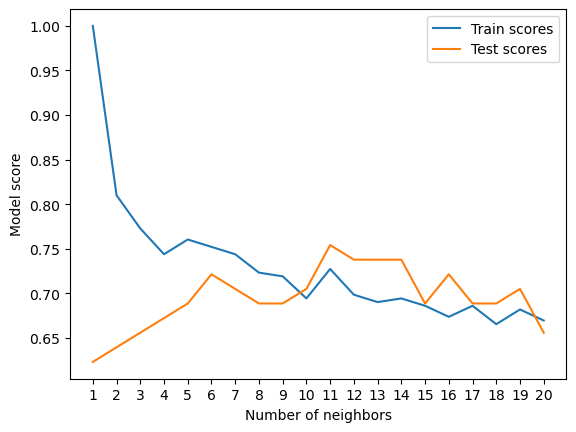

In [139]:
plt.plot(neighbors,train_scores,label="Train scores");
plt.plot(neighbors,test_scores, label="Test scores");

plt.xticks(np.arange(1,21,1));
plt.xlabel("Number of neighbors");
plt.ylabel("Model score");
plt.legend();

print(f"Maximum KNN score on the test data is : {max(test_scores)*100:.2f}%")

##### Hyperparameter tuning with RandomizedSearchCV

We're tuning :

* LogisticRegression()
* RandomForestClassifier()


.... using `RandomizedSearchCV`

In [140]:
# Creating a hyperparameter grid for Logistic Regression() 
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}


# Creating a hyperparameter grid for RandomForestClassifier()
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)};


In [141]:
# Now we have hyperparameters grid for both the models....let's tune the model using RandomizedSearchCV

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


# Fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [142]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [143]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [144]:
# Now do the same for LogisticRegression...
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [145]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': 5}

In [146]:
rs_rf.score(X_test,y_test)

0.8852459016393442

##### Hyperparamter Tuning with GridSearchCV
As previously we saw the LogisticRegression()...provided a better score over the RandomForestClassifier...so let's try to tune it using GridSearchCV

In [147]:
# Making hyperparameter's grid for our LogisticRegerssion model
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit the model using the hyperparameters
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [148]:
# Best Hyperparamters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [149]:
# Evaluate the logisticRegression model using best hyperparamters..
gs_log_reg.score(X_test,y_test)

0.8852459016393442

##### Evaluating our tuned model ,beyond accuracy...

* `ROC curve` and `AUC score`
* `Confusion matrix`
* `Classification report`
* `Precision`
* `Recall`
* `F1-score`

In [150]:
# To make comparisons we need to make predictions first...
y_preds = gs_log_reg.predict(X_test)


In [151]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [152]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [153]:
y_preds_probability = gs_log_reg.predict_proba(X_test)


df1 = pd.DataFrame(y_preds_probability,columns=["probability of getting 0","probability of getting 1"])
df1

,probability of getting 0,probability of getting 1
0,0.867253,0.132747
1,0.244085,0.755915
2,0.185476,0.814524
3,0.945308,0.054692
4,0.115466,0.884534
...,...,...
56,0.912653,0.087347
57,0.061764,0.938236
58,0.971862,0.028138
59,0.986901,0.013099


In [154]:
y_preds_positive = df1["probability of getting 1"]
y_preds_positive

0     0.132747
1     0.755915
2     0.814524
3     0.054692
4     0.884534
        ...   
56    0.087347
57    0.938236
58    0.028138
59    0.013099
60    0.062918
Name: probability of getting 1, Length: 61, dtype: float64

In [155]:
# Calculating false positive rate and true positive rate


fpr, tpr, threshold = roc_curve(y_test, y_preds_positive)



In [156]:
fpr

array([0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.31034483, 0.31034483, 0.4137931 , 0.4137931 ,
       1.        ])

In [157]:
tpr

array([0.     , 0.03125, 0.375  , 0.375  , 0.59375, 0.59375, 0.71875,
       0.71875, 0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875, 0.96875,
       1.     , 1.     ])

In [158]:
threshold

array([1.9675006 , 0.9675006 , 0.85079082, 0.84234231, 0.7781759 ,
       0.73216374, 0.70538844, 0.69480593, 0.54515819, 0.31714637,
       0.14314492, 0.12640328, 0.11904144, 0.0873472 , 0.0715076 ,
       0.00309601])

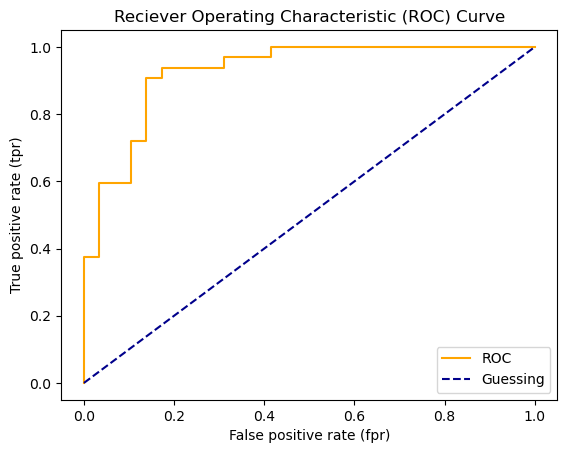

In [159]:
# Plotting ROC curve....
    # The fpr will be in x-axis and tpr in y-axis always...

def plot_roc_curve(fpr,tpr) :
    """ Plots a ROC curve given the false positive  rate (fpr) and true positive rate (tpr) of a model """
    
    
    # plot ROC curve
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    # Plot line with no predictive power (baseline)
        # The closer the ROC curve gets to the baseline curve ...less powerful the model
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Reciever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

Another way of plotting `ROC curve`

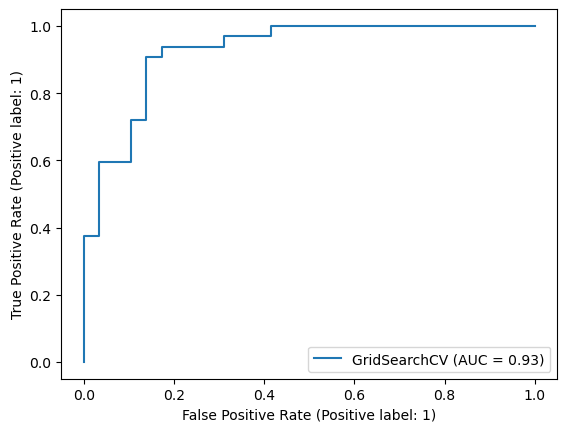

In [160]:

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test);


# AUC - Area under Curve 

***Confusion matrix***


A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

In [161]:
# Confusion matrix

cm = confusion_matrix(y_test,y_preds)
print(cm)

[[25  4]
 [ 3 29]]


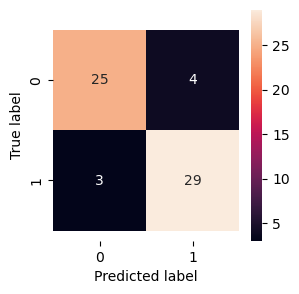

In [162]:
# Visualising the confusion matrix...

def plot_conf_mat (y_test,y_preds):
    """
    Plotting the confusion matrix using seaborn librarry
    """
    fig,ax = plt.subplots(figsize=(3,3));
    ax = sns.heatmap(cm,
                     annot=True,
                     cbar=True)
    
    plt.xlabel( "Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom+0.1,top-0.2)
    
    
    
plot_conf_mat(y_test,y_preds)

##### Classification Report


In [163]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



##### Calculating evaluation metrics using cross validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be 
using  `cross_val_score()` .

In [164]:
# Cheecking best params
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [165]:
# Creating a new classifier with best params
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [166]:
# Cross-validated Accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [167]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [168]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")


cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [169]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [170]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")

cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

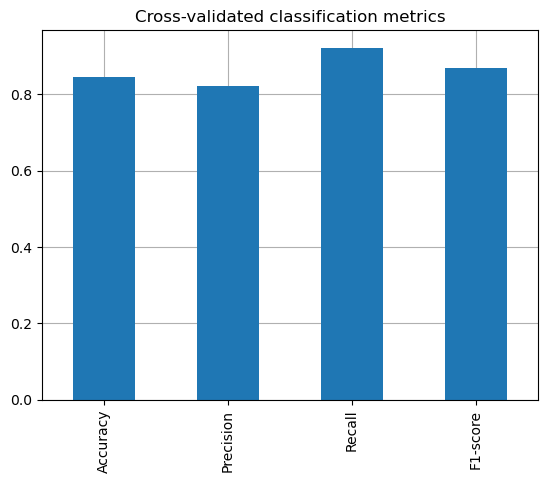

In [171]:
# Visualising Cross-validation metrics


cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1-score":cv_f1},
                          index=[0])

cv_metrics


cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

# Show grid lines without entering the graph area
plt.grid(axis='both', zorder=0)
plt.gca().set_axisbelow(True)

##### Feature Importance
Feature importance is another as asking, `"which features contributed most to the outcomes of the model and how did they contribute?"`

In [172]:
# Fitting an instance of Logistic-Regression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [173]:
# Check coef
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [174]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [175]:
# Match coef's of features to columns
    # Here zip is pairing the columns from the corrosponding values from clf.coef_  respectively...and finally making a dictionary
    # of it...zip() is used to iterate over multiple iterables simultaneously...
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

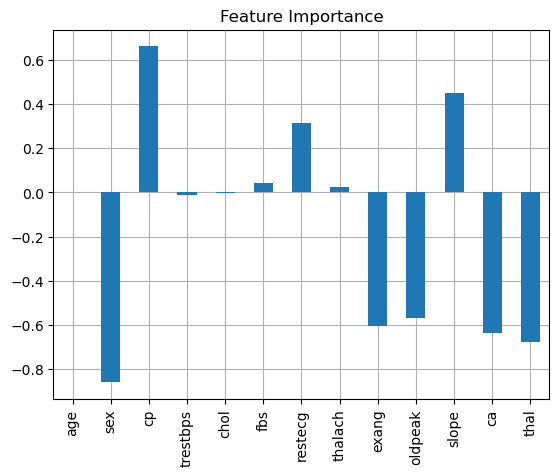

In [176]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,
                          index=[0])
feature_df

ax = feature_df.T.plot.bar(title="Feature Importance",
                      legend=False);

plt.grid(axis='both', zorder=0);
plt.gca().set_axisbelow(True);

# ax.axhline(0, color='lightcoral', linestyle='--');


In [177]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when ***`sex`*** is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (***`target`*** = 1) than without.

And then as ***`sex`*** increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

In [178]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


### 6. Experimentation

The whole workflow we did is the `Experimentation`.

From trying different models, to tuning different models to figuring out which `hyperparameters` were best.



Here trying two more models :
1. `CatBoosting` (Categorical Boosting)
2. `XGBoost` (Extreme Gradient Boosting)

In [179]:
# Import required libraries

import catboost as cb
import xgboost as xgb



# CatBoost classifier
cat_model = cb.CatBoostClassifier()
cat_model.fit(X_train, y_train)

# Predict using CatBoost model
cat_predictions = cat_model.predict(X_test)
cat_accuracy = accuracy_score(y_test, cat_predictions)
print("CatBoost Accuracy:", cat_accuracy)

# XGBoost classifier
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Predict using XGBoost model
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 1.58ms	remaining: 1.57s
1:	learn: 0.6846994	total: 2.71ms	remaining: 1.35s
2:	learn: 0.6804470	total: 3.72ms	remaining: 1.24s
3:	learn: 0.6762242	total: 4.74ms	remaining: 1.18s
4:	learn: 0.6716784	total: 5.75ms	remaining: 1.14s
5:	learn: 0.6672808	total: 6.75ms	remaining: 1.12s
6:	learn: 0.6639958	total: 8.2ms	remaining: 1.16s
7:	learn: 0.6601980	total: 9.26ms	remaining: 1.15s
8:	learn: 0.6563766	total: 10.5ms	remaining: 1.16s
9:	learn: 0.6525103	total: 11.7ms	remaining: 1.16s
10:	learn: 0.6483670	total: 12.7ms	remaining: 1.14s
11:	learn: 0.6448827	total: 13.8ms	remaining: 1.13s
12:	learn: 0.6412767	total: 15.3ms	remaining: 1.16s
13:	learn: 0.6374286	total: 16.5ms	remaining: 1.16s
14:	learn: 0.6335427	total: 17.6ms	remaining: 1.16s
15:	learn: 0.6288052	total: 18.8ms	remaining: 1.16s
16:	learn: 0.6250489	total: 19.9ms	remaining: 1.15s
17:	learn: 0.6209495	total: 21.2ms	remaining: 1.16s
18:	learn: 0.6181899	total: 22.3ms	remaining:

In [180]:
# Here considering the cross-validated model (clf) instead of normal model with GridSearchCV (gs_log_reg)
pickle.dump(clf, open("Heart-Disease-Prediction.pkl", "wb"))



# Loading model 

loaded_clf = pickle.load(open("Heart-Disease-Prediction.pkl","rb"))


# Function to take input of different features from user
def get_user_input():
    age = int(input("Enter the age of person : "))
    sex = int(input("Enter the sex of the person (0 - female, 1 - male) : "))
    cp = int(input("Enter chest pain type : "))
    trestbps = int(input("Enter resting blood pressure : "))
    chol = int(input("serum cholestoral in mg/dl : "))
    fbs = int(input("Enter fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) : "))
    restecg = int(input("Enter resting electrocardiographic results (0, 1, 2) : "))
    thalach = int(input("Enter maximum heart rate achieved"))
    exang = int(input("Enter if exercise induced angina (1 = yes; 0 = no) :"))
    oldpeak = float(input("Enter the value of ST depression induced by exercise relative to rest"))
    slope = int(input("Enter the slope of the peak exercise ST segment (0 - Upsloping, 1 - Flatsloping, 2 - Downsloping)"))
    ca = int(input("Enter number of major vessels (0-3) colored by flourosopy"))
    thal = int(input("Enter thalium stress result"))
    
    
    
    user_input_dict = {}
    user_input_dict["age"] = age
    user_input_dict["sex"] = sex
    user_input_dict["cp"] = cp
    user_input_dict["trestbps"] = trestbps
    user_input_dict["chol"] = chol
    user_input_dict["fbs"] = fbs
    user_input_dict["restecg"] = restecg
    user_input_dict["thalach"] = thalach
    user_input_dict["exang"] = exang
    user_input_dict["oldpeak"] = oldpeak
    user_input_dict["slope"] = slope
    user_input_dict["ca"] = ca
    user_input_dict["thal"] = thal
    
       
    
    
    user_data = pd.DataFrame({"age":age,
                              "sex":sex,
                              "cp":cp,
                              "trestbps":trestbps,
                              "chol":chol,
                              "fbs":fbs,
                              "restecg":restecg,
                              "thalach":thalach,
                              "exang":exang,
                              "oldpeak":oldpeak,
                              "slope":slope,
                              "ca":ca,
                              "thal":thal
                              },index=[0])
    
    
    return user_data,user_input_dict







# Function to predict person has Heart-Disease or not
def predict_heart_disease(user_data):
    
    
    prediction = loaded_clf.predict(user_data)
    if prediction == 1:
        return "There is high chance that Person is suffering from heart Disease"
    else:
        return "There is a very low chance that the Person is suffering from heart disease"





# Get user input
user_data,user_input_dict = get_user_input()
prediction = predict_heart_disease(user_data)




# Printing Input given by user
print("Input's are following - ")
for feature_name, value in user_input_dict.items():
    print(f"{feature_name} : {value}",end=", ")






# Printing the result predicted by our model
print("\nPrediction:", prediction)

Input's are following - 
age : 24, sex : 1, cp : 2, trestbps : 135, chol : 221, fbs : 0, restecg : 1, thalach : 142, exang : 1, oldpeak : 2.8, slope : 1, ca : 0, thal : 1, 
Prediction: There is high chance that Person is suffering from heart Disease
